In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

In [2]:
plt.style.use('fivethirtyeight')

# <font color='red'> This project aims to predict the popularity of news articles published in Mashable over a period of two years </font>

## 1. Import Dataset

In [3]:
df=pd.read_csv('/Users/clemencedelouche/Documents/ESILV/A4/Python/PROJET/OnlineNewsPopularity.csv')

In [4]:
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [5]:
 original_df = copy(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [7]:
df.shape

(39644, 61)

In [8]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

## 2. Description of the dataset and fixing outliers

In [9]:
df.drop(columns=" timedelta", inplace=True)
df.drop(columns = 'url', inplace=True)

In [10]:
print ("After non-predictive variables removal - ",df.shape)

After non-predictive variables removal -  (39644, 59)


In [11]:
df['publish_day']= 0 #Creation of a new column 'publish_day'
df['publish_day'] = np.where(df[' weekday_is_monday']==1, 'Monday',df['publish_day'])
df['publish_day'] = np.where(df[' weekday_is_tuesday']==1, 'Tuesday',df['publish_day'])
df['publish_day'] = np.where(df[' weekday_is_wednesday']==1, 'Wednesday',df['publish_day'])
df['publish_day'] = np.where(df[' weekday_is_thursday']==1, 'Thursday',df['publish_day'])
df['publish_day'] = np.where(df[' weekday_is_friday']==1, 'Friday',df['publish_day'])
df['publish_day'] = np.where(df[' weekday_is_saturday']==1, 'Saturday',df['publish_day'])
df['publish_day'] = np.where(df[' weekday_is_sunday']==1, 'Sunday',df['publish_day'])

In [12]:
df

n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  ...  \
0                  2.0        1.0          0.0               4.680365  ...   
1                  1.0        1.0          0.0               4.913725  ...   
2                  1.0        1.0          0.0               4.393365  ...   
3                  0.0        1.0          0.0               4.404896  ...   
4                 19.0       20.0          0.0               4.682836  ...   
...                ...        ...          ...                    ...  ...   
39639              7.0        1.0          1.0               4.523121  ...   
39640              7.0        3.0         48.0               4.405488  ...   
39641              1.0       12.0          1.0               5.076923  ...   
39642              1.0        1.0          0.0               4.975073  ...   
39643              1.0        0.0          2.0               4.471338  ...   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                    0.50               -0.205246                  -0.500   
39643                    0.50               -0.200000                  -0.200   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                   -0.200000             0.500000                  -0.187500   
1                   -0.100000             0.000000                   0.000000   
2                   -0.133333             0.000000                   0.000000   
3                   -0.166667             0.000000                   0.000000   
4                   -0.050000             0.454545                   0.136364   
...                       ...                  ...

In [13]:
df['channel'] = 0 #Creation of a new column "channel"
df['channel'] = np.where(df[' data_channel_is_lifestyle']==1, 'Lifestyle',df['channel'])
df['channel'] = np.where(df[' data_channel_is_entertainment']==1, 'Entertainement',df['channel'])
df['channel'] = np.where(df[' data_channel_is_bus']==1, 'Business',df['channel'])
df['channel'] = np.where(df[' data_channel_is_socmed']==1, 'Social media',df['channel'])
df['channel'] = np.where(df[' data_channel_is_tech']==1, 'Tech',df['channel'])
df['channel'] = np.where(df[' data_channel_is_world']==1, 'World',df['channel'])
df

n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  ...  \
0                  2.0        1.0          0.0               4.680365  ...   
1                  1.0        1.0          0.0               4.913725  ...   
2                  1.0        1.0          0.0               4.393365  ...   
3                  0.0        1.0          0.0               4.404896  ...   
4                 19.0       20.0          0.0               4.682836  ...   
...                ...        ...          ...                    ...  ...   
39639              7.0        1.0          1.0               4.523121  ...   
39640              7.0        3.0         48.0               4.405488  ...   
39641              1.0       12.0          1.0               5.076923  ...   
39642              1.0        1.0          0.0               4.975073  ...   
39643              1.0        0.0          2.0               4.471338  ...   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0                   -0.350000                  -0.600               -0.200000   
1                   -0.118750                  -0.125               -0.100000   
2                   -0.466667                  -0.800               -0.133333   
3                   -0.369697                  -0.600               -0.166667   
4                   -0.220192                  -0.500               -0.050000   
...                       ...                     ...                     ...   
39639               -0.260000                  -0.500               -0.125000   
39640               -0.211111                  -0.400               -0.100000   
39641               -0.356439                  -0.800               -0.166667   
39642               -0.205246                  -0.500               -0.012500   
39643               -0.200000                  -0.200               -0.200000   

        title_subjectivity   title_sentiment_polarity  \
0                 0.500000                  -0.187500   
1                 0.000000                   0.000000   
2                 0.000000                   0.000000   
3                 0.000000                   0.000000   
4                 0.454545                   0.136364   
...                    ...                        ...   
39639             0.100000                   0.000000   
39640             0.300000                   1.000000   
39641             0.454

In [14]:
df['channel'] = df['channel'].apply(lambda x: 'Other' if x == '0' else x) 

In [15]:
df

n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  ...  \
0                  2.0        1.0          0.0               4.680365  ...   
1                  1.0        1.0          0.0               4.913725  ...   
2                  1.0        1.0          0.0               4.393365  ...   
3                  0.0        1.0          0.0               4.404896  ...   
4                 19.0       20.0          0.0               4.682836  ...   
...                ...        ...          ...                    ...  ...   
39639              7.0        1.0          1.0               4.523121  ...   
39640              7.0        3.0         48.0               4.405488  ...   
39641              1.0       12.0          1.0               5.076923  ...   
39642              1.0        1.0          0.0               4.975073  ...   
39643              1.0        0.0          2.0               4.471338  ...   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0                   -0.350000                  -0.600               -0.200000   
1                   -0.118750                  -0.125               -0.100000   
2                   -0.466667                  -0.800               -0.133333   
3                   -0.369697                  -0.600               -0.166667   
4                   -0.220192                  -0.500               -0.050000   
...                       ...                     ...                     ...   
39639               -0.260000                  -0.500               -0.125000   
39640               -0.211111                  -0.400               -0.100000   
39641               -0.356439                  -0.800               -0.166667   
39642               -0.205246                  -0.500               -0.012500   
39643               -0.200000                  -0.200               -0.200000   

        title_subjectivity   title_sentiment_polarity  \
0                 0.500000                  -0.187500   
1                 0.000000                   0.000000   
2                 0.000000                   0.000000   
3                 0.000000                   0.000000   
4                 0.454545                   0.136364   
...                    ...                        ...   
39639             0.100000                   0.000000   
39640             0.300000                   1.000000   
39641             0.454

In [16]:
df['popularity'] = df[' shares'] #Creation of a new column in the dataset
df['popularity'] = df['popularity'].apply(lambda x: 'Extremely popular' if x > 10800 else 'Popular' if x > 2300  else 'Average' if x > 1400 else 'Unpopular' if x > 946 else 'Extremely unpopular')
df

n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  ...  \
0                  2.0        1.0          0.0               4.680365  ...   
1                  1.0        1.0          0.0               4.913725  ...   
2                  1.0        1.0          0.0               4.393365  ...   
3                  0.0        1.0          0.0               4.404896  ...   
4                 19.0       20.0          0.0               4.682836  ...   
...                ...        ...          ...                    ...  ...   
39639              7.0        1.0          1.0               4.523121  ...   
39640              7.0        3.0         48.0               4.405488  ...   
39641              1.0       12.0          1.0               5.076923  ...   
39642              1.0        1.0          0.0               4.975073  ...   
39643              1.0        0.0          2.0               4.471338  ...   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                      -0.600               -0.200000             0.500000   
1                      -0.125               -0.100000             0.000000   
2                      -0.800               -0.133333             0.000000   
3                      -0.600               -0.166667             0.000000   
4                      -0.500               -0.050000             0.454545   
...                       ...                     ...                  ...   
39639                  -0.500               -0.125000             0.100000   
39640                  -0.400               -0.100000             0.300000   
39641                  -0.800               -0.166667             0.454545   
39642                  -0.500               -0.012500             0.000000   
39643                  -0.200               -0.200000             0.333333   

        title_sentiment_polarity   abs_title_subjectivity  \
0                      -0.187500                 0.000000   
1                       0.000000                 0.500000   
2                       0.000000                 0.500000   
3                       0.000000                 0.500000   
4                       0.136364                 0.045455   
...                          ...                      ...   
39639                   0.000000                 0.400000   
39640                   1.000000                 0.200000   
39641                  

#### n_tokens_title

<AxesSubplot:xlabel='popularity', ylabel=' n_tokens_title'>

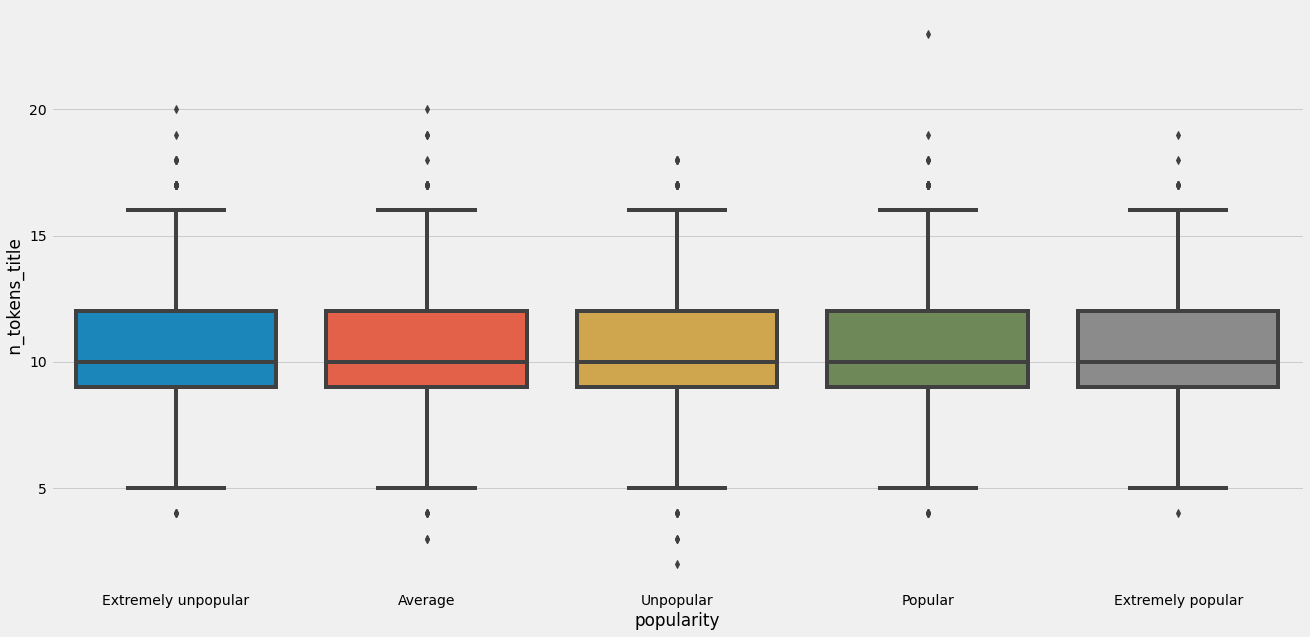

In [17]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' n_tokens_title', data=df, ax=axes)

In [18]:
# Noise Removal : 
df  = df[df[' n_tokens_title'] <= 20]
print ("After noise removal - ",df.shape)

After noise removal -  (39643, 62)


#### n_tokens_content

In [19]:
df[' n_tokens_content'].describe()

count    39643.000000
mean       546.508337
std        471.111730
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name:  n_tokens_content, dtype: float64

In [20]:
df  = df[df[' n_tokens_content'] != 0]

<AxesSubplot:xlabel='popularity', ylabel=' n_tokens_content'>

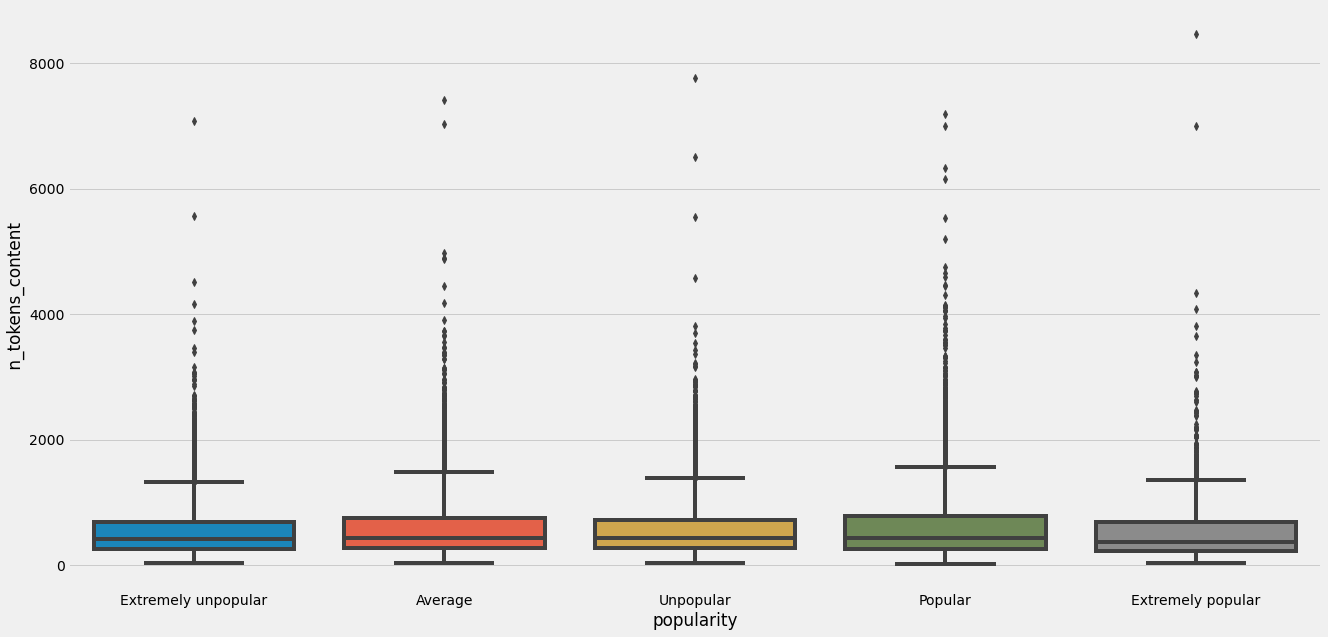

In [21]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' n_tokens_content', data=df, ax=axes)

In [22]:
# Noise Removal
df  = df[df[' n_tokens_content'] <= 3500]
print ("After noise removal - ",df.shape)

After noise removal -  (38395, 62)


#### num_hrefs

<AxesSubplot:xlabel='popularity', ylabel=' num_hrefs'>

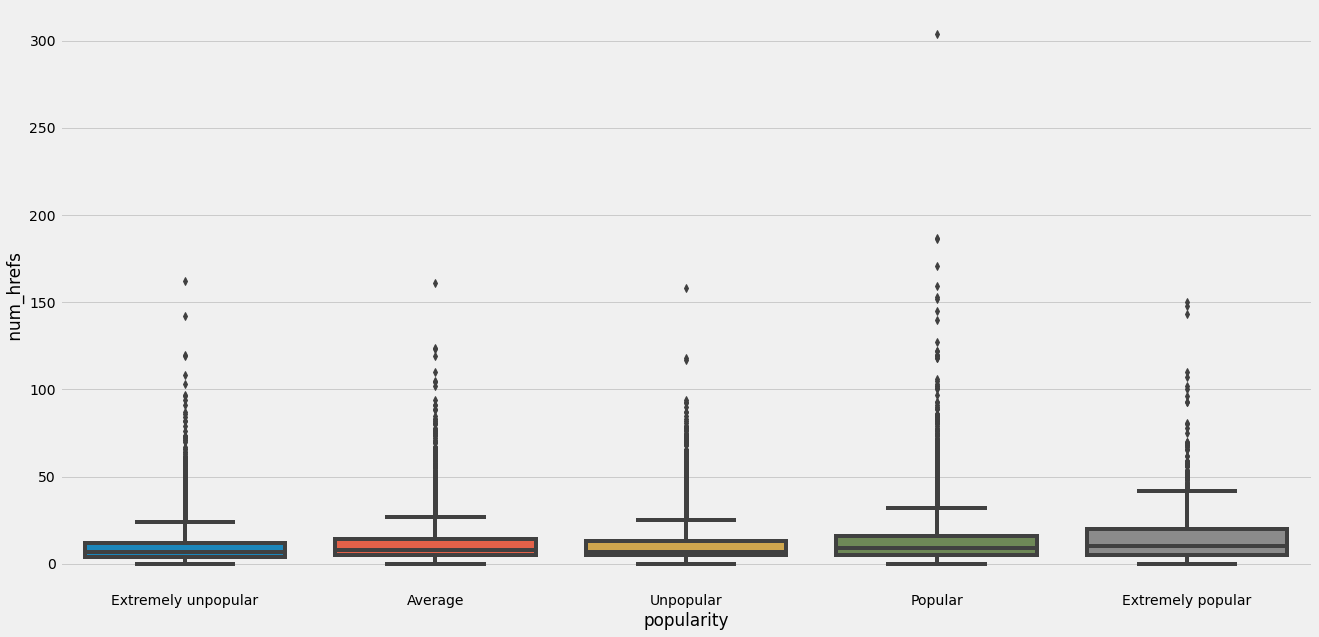

In [23]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' num_hrefs', data=df, ax=axes)

In [24]:
# Noise Removal 
df  = df[df[' num_hrefs'] <= 100]
print ("After noise removal - ",df.shape)

After noise removal -  (38349, 62)


####  num_imgs

<AxesSubplot:xlabel='popularity', ylabel=' num_imgs'>

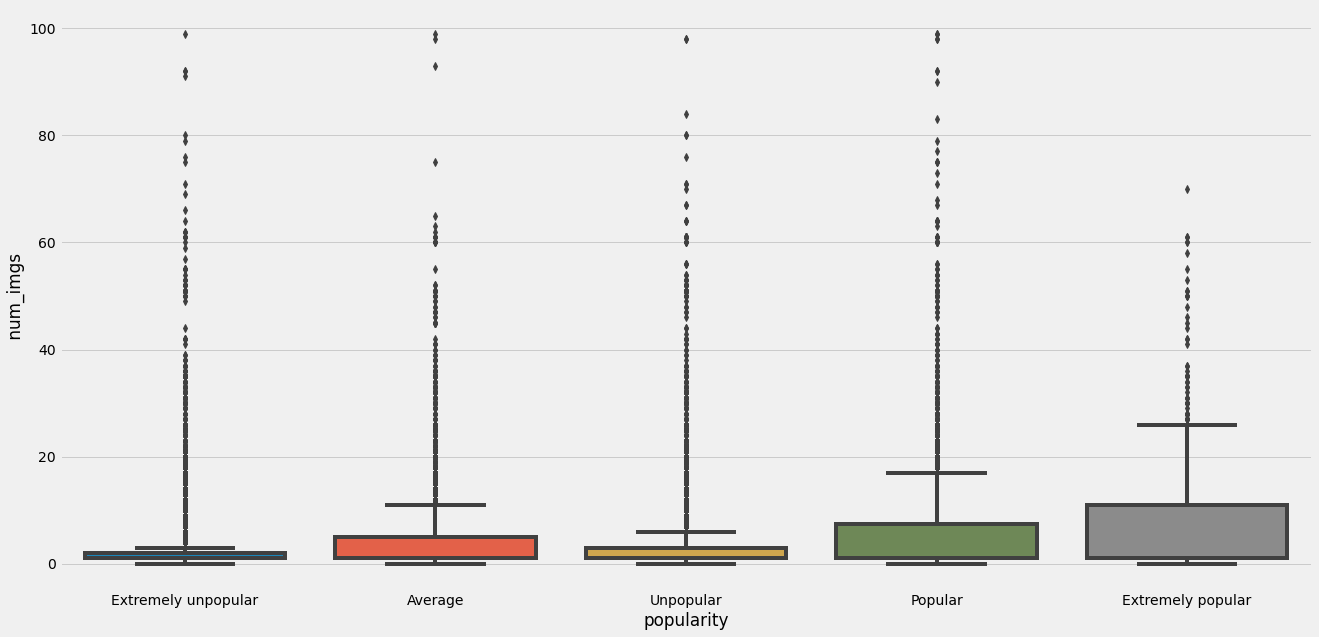

In [25]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' num_imgs', data=df, ax=axes)

In [26]:
# Noise Removal
df  = df[df[' num_imgs'] <= 80]
print ("After noise removal - ",df.shape)

After noise removal -  (38331, 62)


####  num_videos

<AxesSubplot:xlabel='popularity', ylabel=' num_videos'>

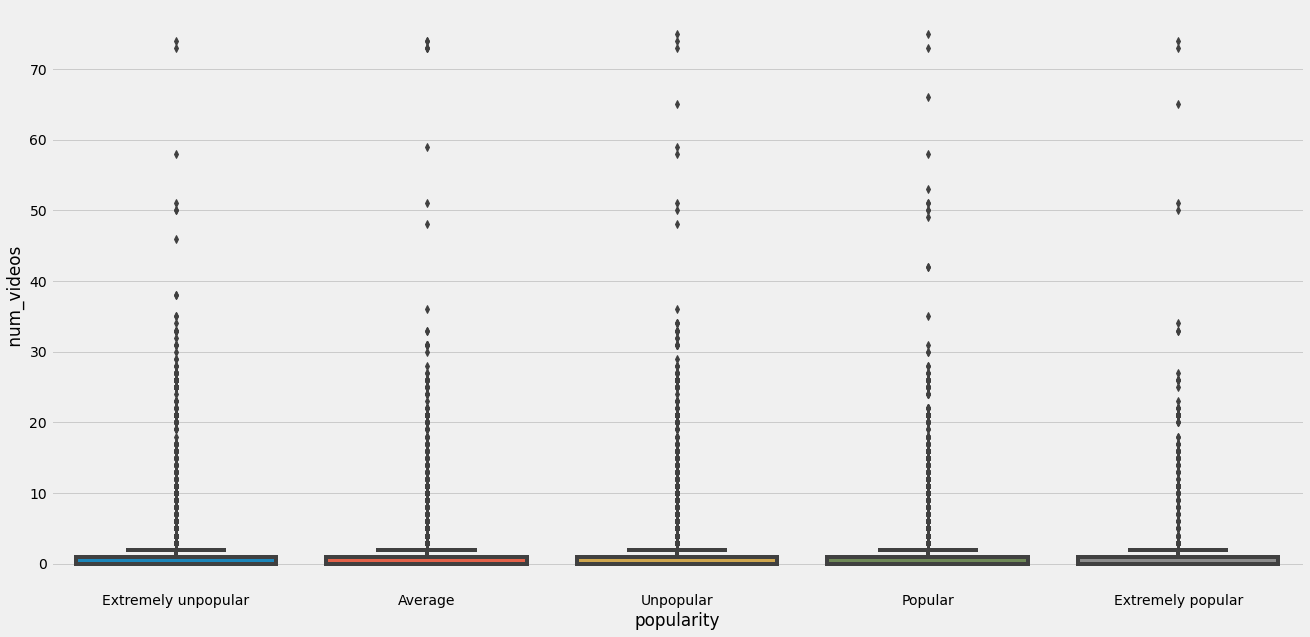

In [27]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' num_videos', data=df, ax=axes)

In [28]:
# Noise Removal 
df  = df[df[' num_videos'] <= 40]
print ("After noise removal - ",df.shape)

After noise removal -  (38290, 62)


#### kw_avg_avg

<AxesSubplot:xlabel='popularity', ylabel=' kw_avg_avg'>

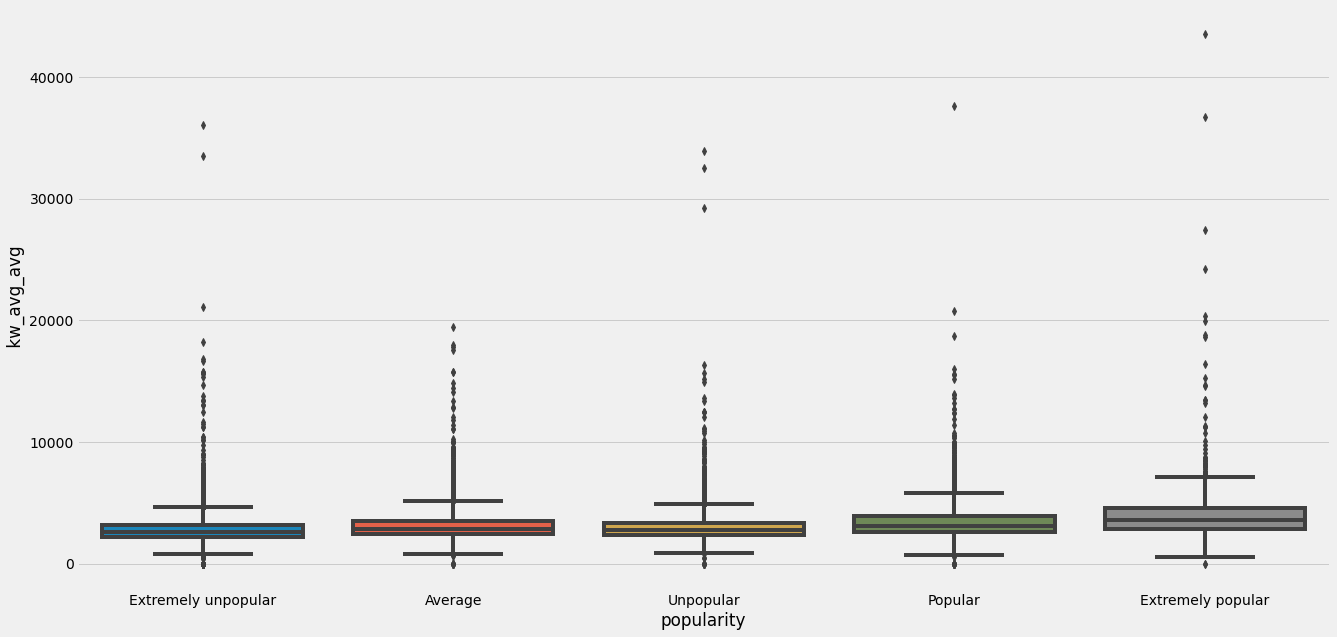

In [29]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(x='popularity', y=' kw_avg_avg', data=df, ax=axes)

In [30]:
# Noise Removal 
df  = df[df[' kw_avg_avg'] <= 12500]
print ("After noise removal - ",df.shape)

After noise removal -  (38221, 62)


#### Shares

/Users/clemencedelouche/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


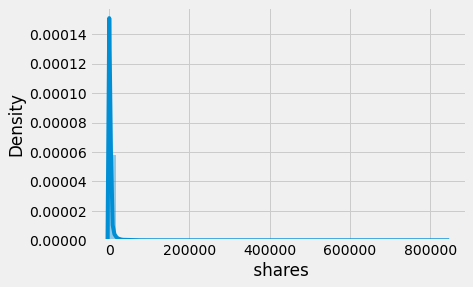

In [31]:
sns.distplot(df[' shares'])
plt.show()

/Users/clemencedelouche/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


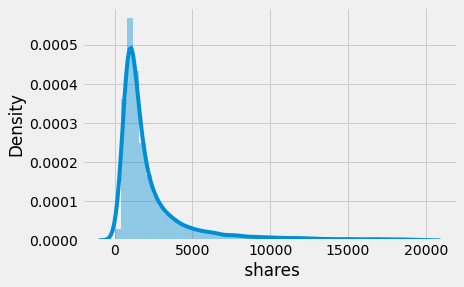

In [32]:
sns.distplot(df[df[' shares']<20000][' shares'])
plt.show()

In [33]:
# Noise Removal
df  = df[df[' shares'] <= 20000]
print ("After noise removal - ",df.shape)

After noise removal -  (37470, 62)


## 3. Data Visualization

### Global visualization of the dataset

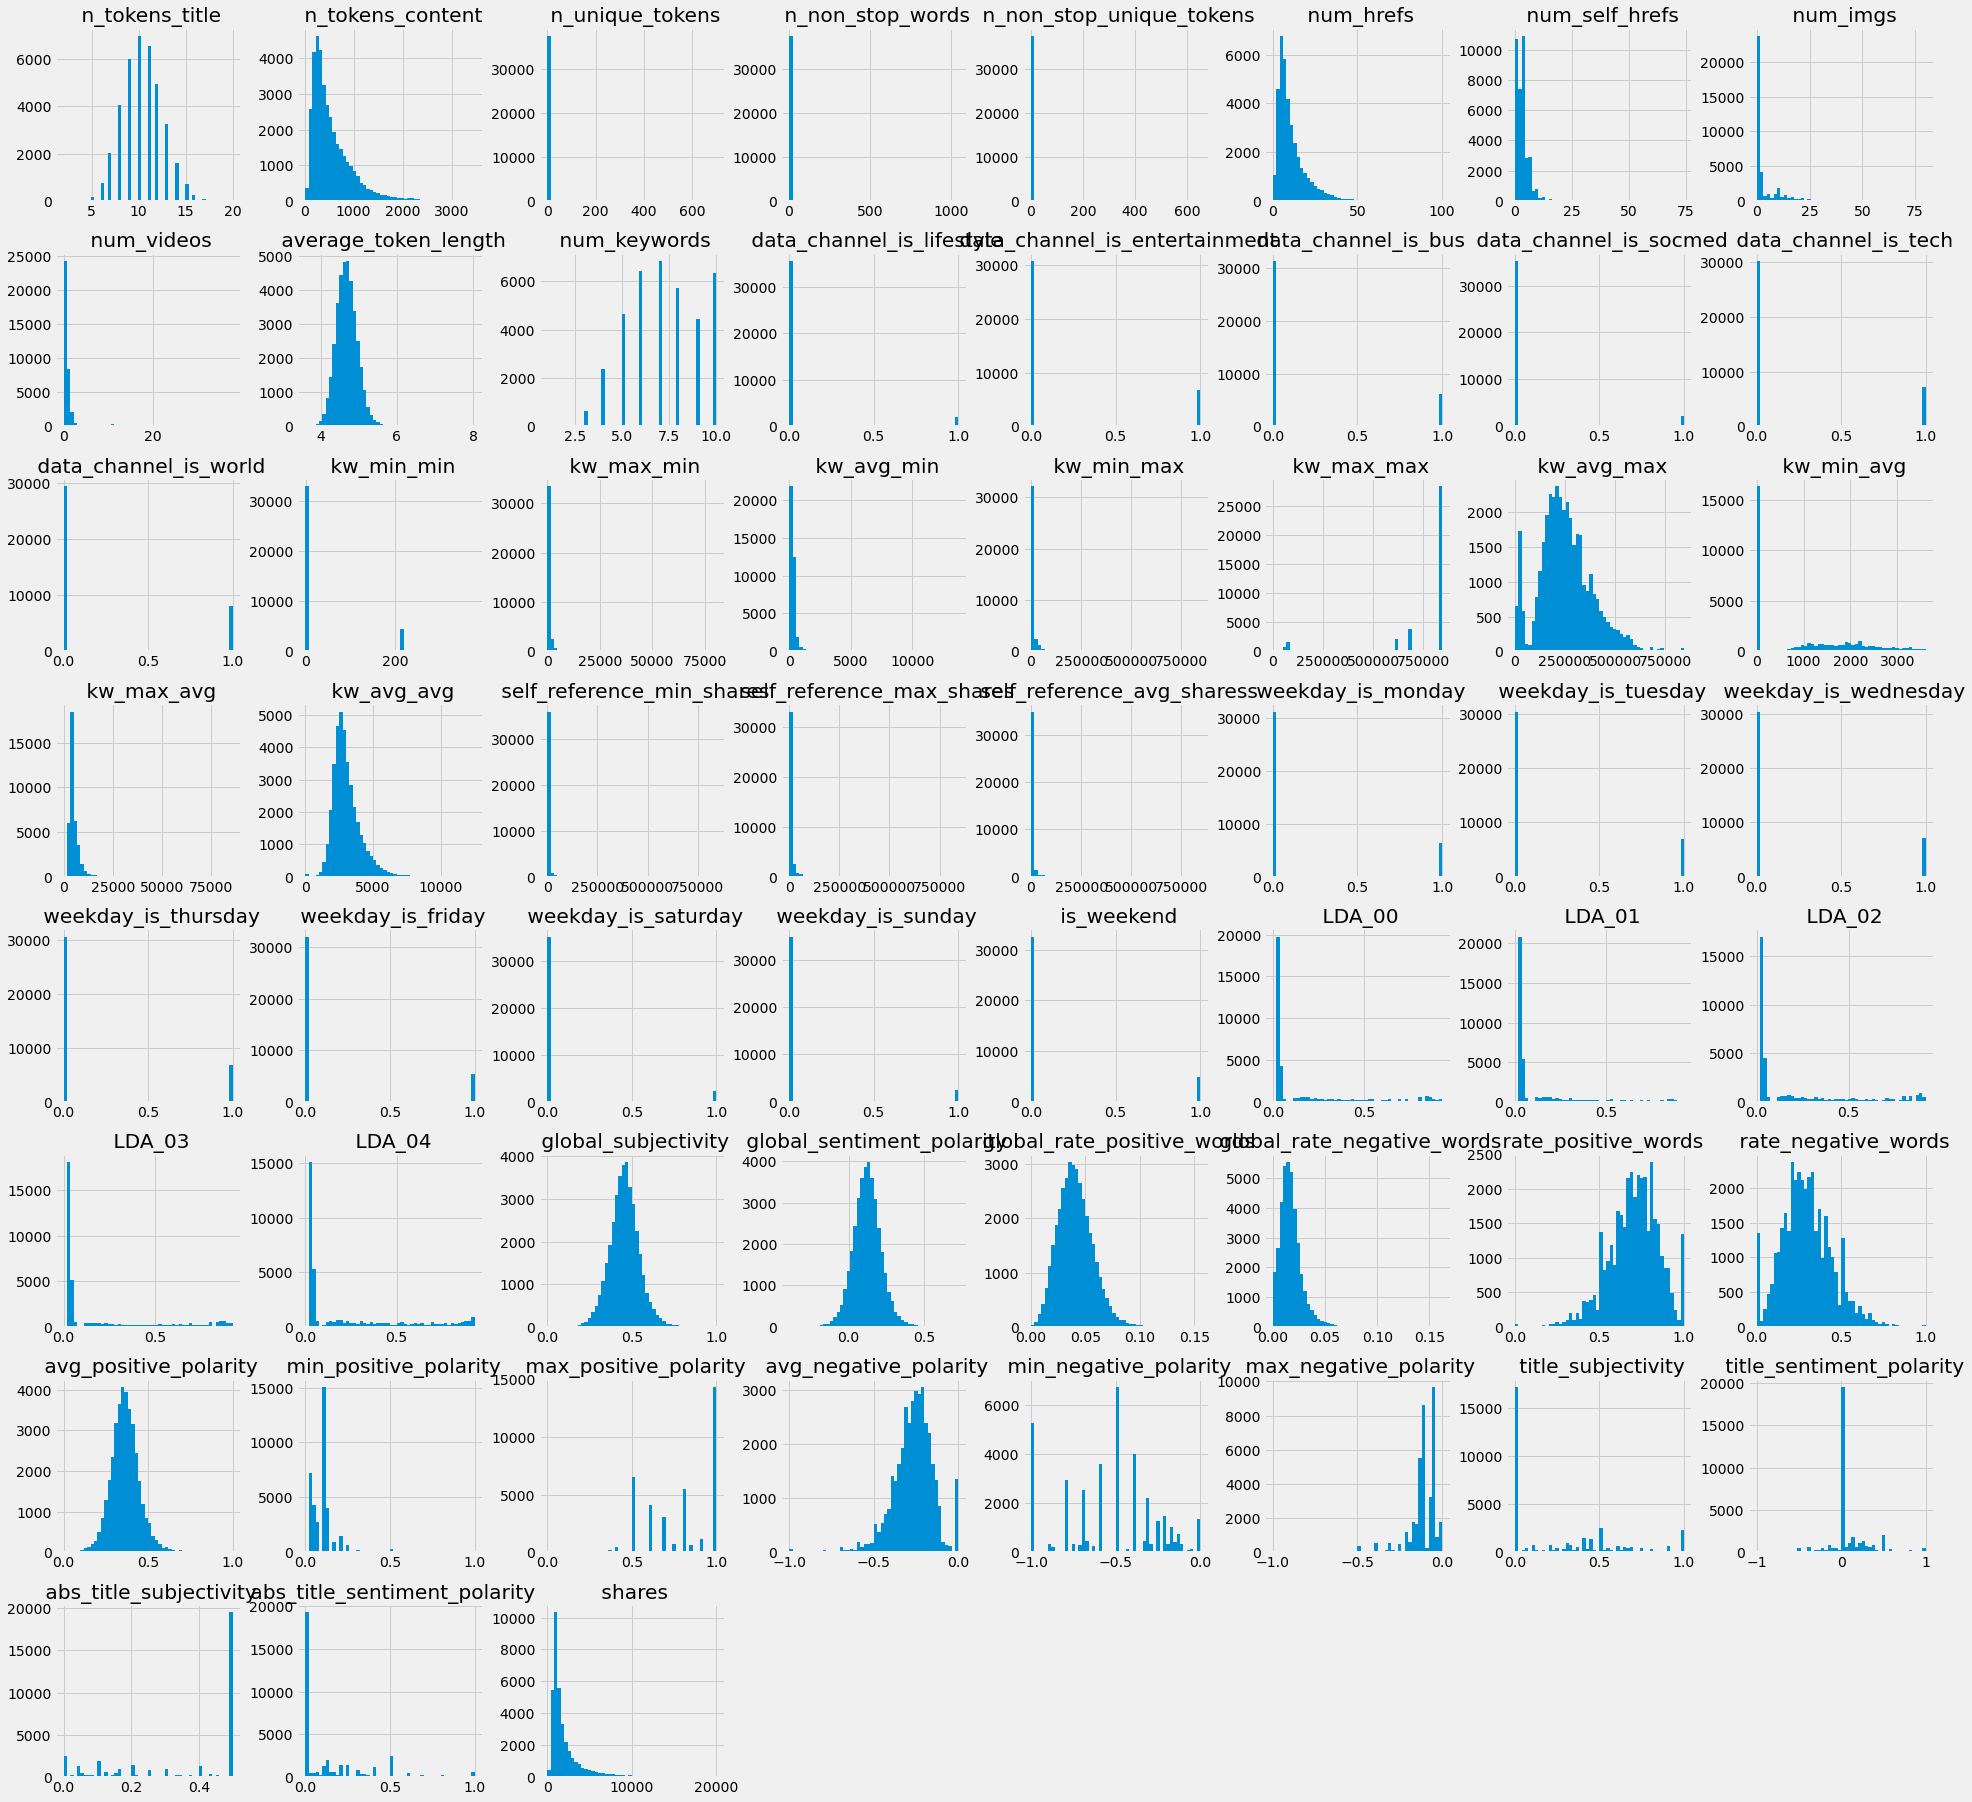

In [34]:
df.hist(bins=50, figsize= (30,30))
plt.show()

### Correlation Matrix

In [35]:
corr_matrix=df.corr()
corr_matrix[" shares"].sort_values(ascending=False)

 shares                           1.000000
 kw_avg_avg                       0.195731
 kw_max_avg                       0.113334
 LDA_03                           0.109327
 global_subjectivity              0.108716
 num_hrefs                        0.089108
 kw_min_avg                       0.079596
 is_weekend                       0.078740
 num_imgs                         0.078238
 self_reference_avg_sharess       0.067536
 avg_positive_polarity            0.064676
 data_channel_is_socmed           0.060536
 self_reference_min_shares        0.060524
 max_positive_polarity            0.056561
 self_reference_max_shares        0.055209
 weekday_is_sunday                0.054120
 weekday_is_saturday              0.053316
 num_keywords                     0.051007
 abs_title_sentiment_polarity     0.049011
 title_subjectivity               0.046409
 global_sentiment_polarity        0.045776
 global_rate_positive_words       0.043057
 title_sentiment_polarity         0.040909
 kw_avg_min

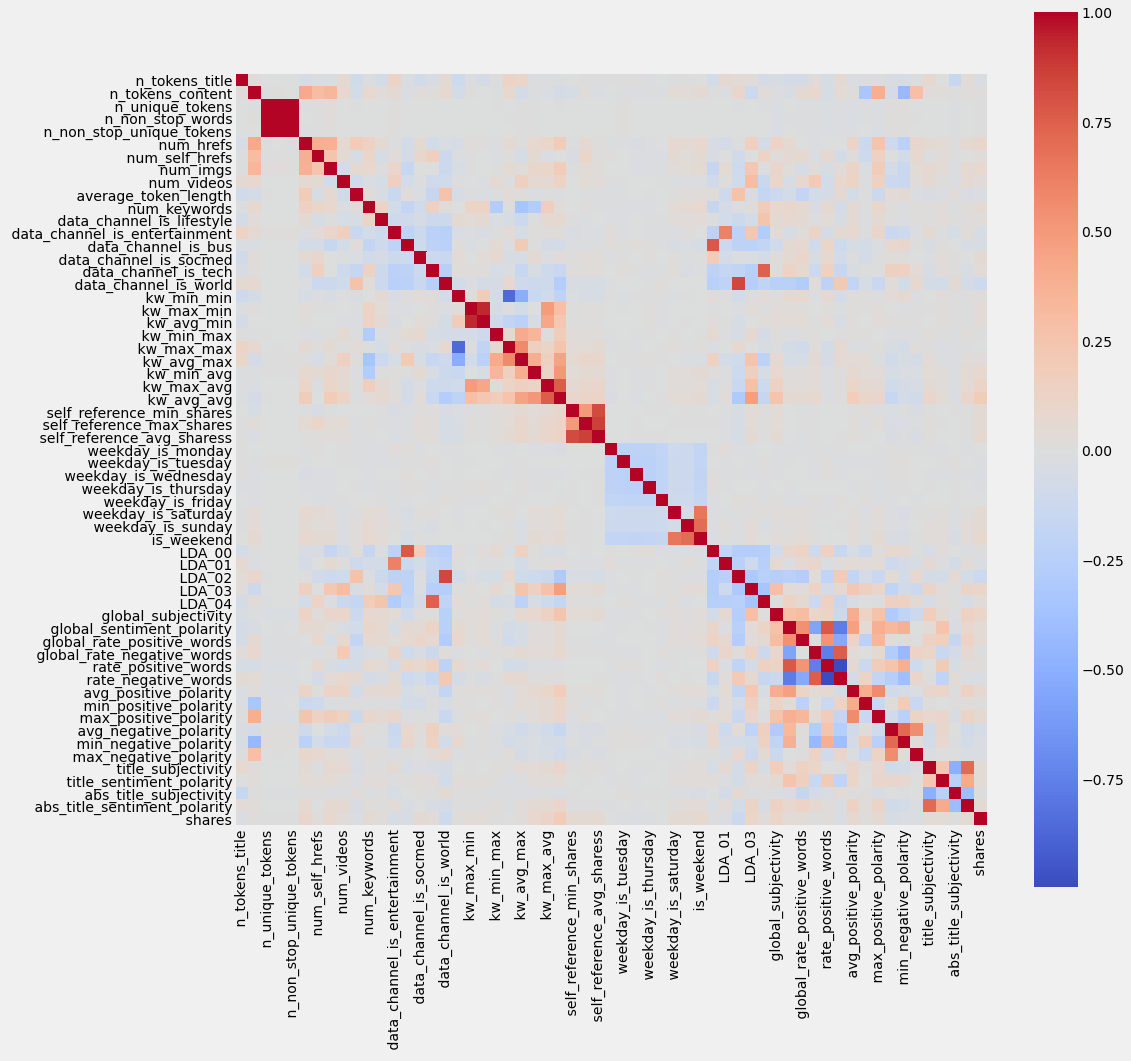

In [36]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, square=True, cmap="coolwarm");
plt.show()

In [37]:
df.drop(columns = ' n_non_stop_unique_tokens', inplace=True)
df.drop(columns = ' n_non_stop_words', inplace=True)
df.drop(columns = ' kw_avg_min', inplace=True)
df.drop(columns = ' kw_max_min', inplace=True)
df.drop(columns = ' n_unique_tokens', inplace=True)
print ("After columns removal - ",df.shape)

After columns removal -  (37470, 57)


### Scatter Matrix of the 15 most correlated features :

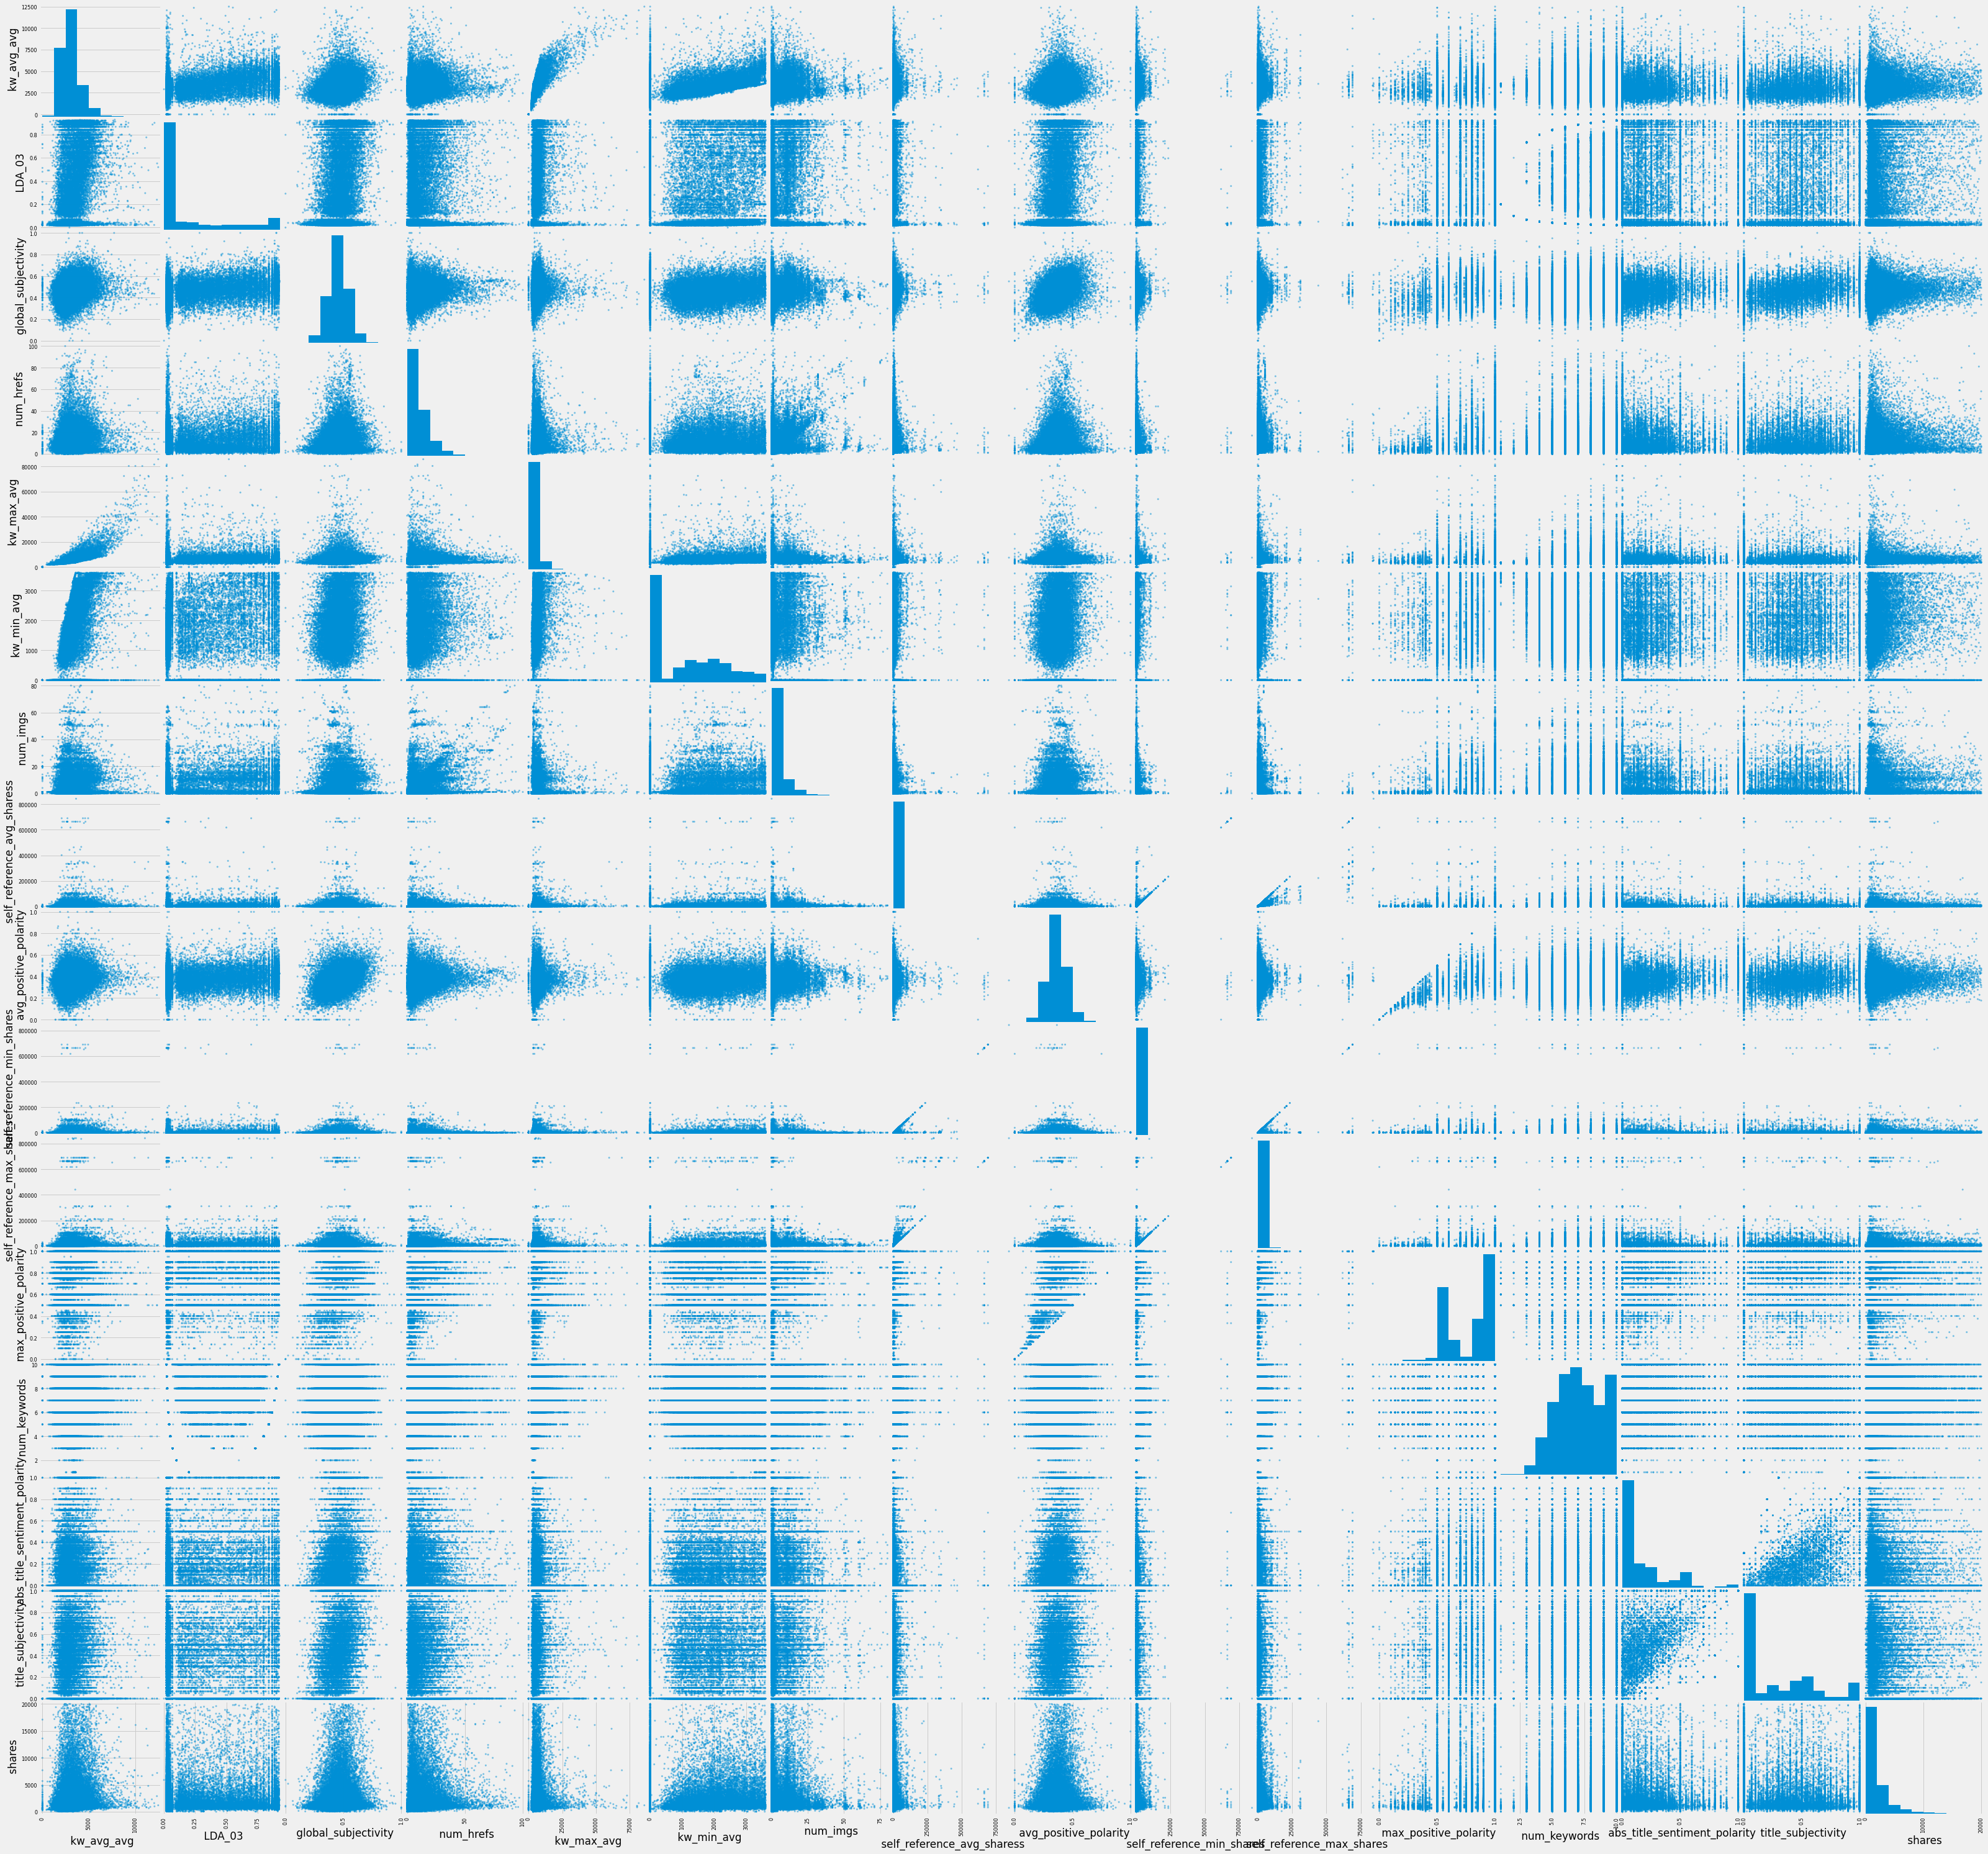

In [38]:
attributes = [' kw_avg_avg',' LDA_03',' global_subjectivity',' num_hrefs',' kw_max_avg',' kw_min_avg',' num_imgs',' self_reference_avg_sharess',' avg_positive_polarity',' self_reference_min_shares',' self_reference_max_shares',' max_positive_polarity',' num_keywords',' abs_title_sentiment_polarity',' title_subjectivity',' shares']
pd.plotting.scatter_matrix(df[attributes], figsize=(50, 50)); 

### PCA

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
#Creation of a temporary dataframe 
df_temp1 = copy(df)

In [41]:
#Removal of all columns we don't need for the PCA :
df_temp1.drop(columns = 'publish_day', inplace=True)
df_temp1.drop(columns = 'channel', inplace=True)
df_temp1.drop(columns = 'popularity', inplace=True)

In [42]:
#Normalization
temp = df_temp1.sub(df.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
df_temp1= temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonne

In [44]:
pca = PCA(n_components=15) 
pca.fit(df_temp1)


print(pca.singular_values_) 
print(pca.explained_variance_ratio_) 

#Dataframe for results 

data_sortie= pca.fit_transform(df_temp1)
print(data_sortie)

[416.6313722  398.12723084 335.59277575 311.3116377  304.67095878
 290.00679811 285.40176734 278.17679374 273.71260911 263.49016965
 248.50079598 239.82219277 235.30406186 223.3480122  214.61459441]
[0.08579028 0.07833898 0.05566207 0.04789882 0.04587713 0.04156717
 0.04025756 0.03824511 0.03702745 0.03431334 0.03052036 0.02842581
 0.02736484 0.02465462 0.02276421]
[[-5.39794322e-01 -1.59625634e+00 -1.52740910e+00 ...  4.23753937e-01
  -1.67273279e+00  1.81875933e-01]
 [-1.18223022e+00 -4.54878268e+00  9.11145395e-01 ... -2.15870091e-01
  -1.14924967e+00  4.15518012e-02]
 [-3.19556715e+00 -1.59334960e+00 -1.74607716e+00 ...  7.09929909e-01
  -1.55073866e+00 -4.51575473e-03]
 ...
 [ 1.98629382e+00  1.88485918e+00  3.79959310e-01 ... -5.66529628e-01
  -5.33510602e-01  2.23749277e+00]
 [ 4.08859879e+00 -3.50169480e+00  4.83372183e-01 ...  4.67275615e-01
   6.21437535e-01  1.93545318e+00]
 [-9.58484596e-01  9.22135309e-01  2.71948082e+00 ...  2.31983959e+00
   5.02332655e-01  2.27903374e+0

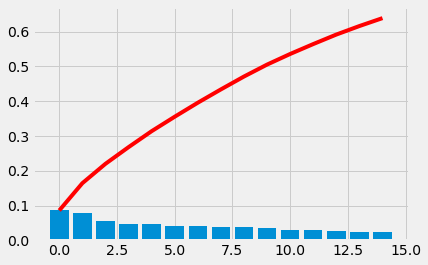

In [45]:
# Pareto diagram

import numpy as np

y = list(pca.explained_variance_ratio_)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,"-r")
plt.show()

### Barplots

#### Weekdays

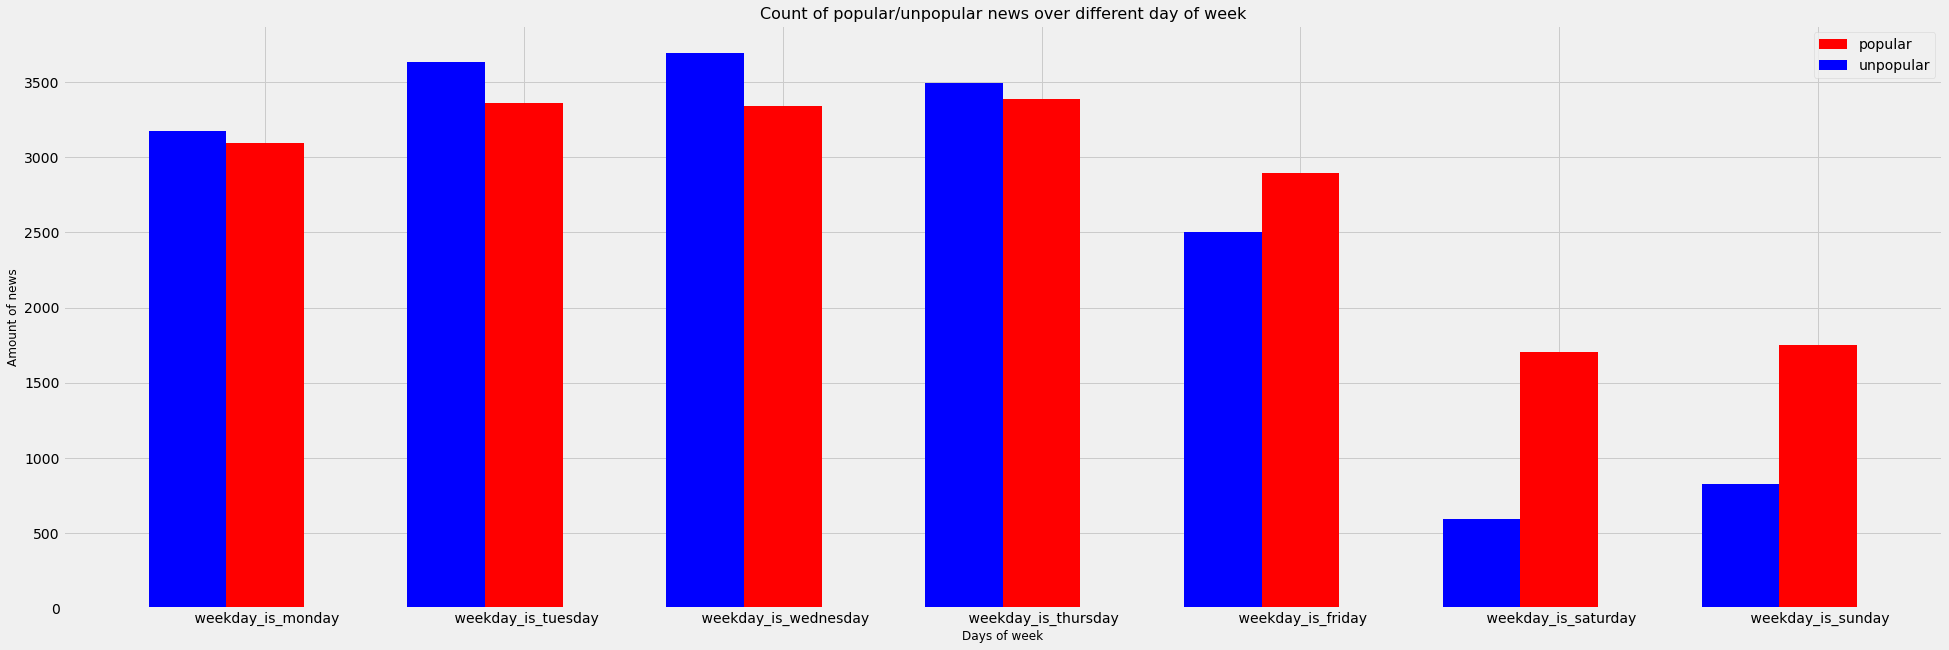

In [46]:
columns_day = df.columns.values[24:31]

unpop=df[df[' shares']<1400]
pop=df[df[' shares']>=1400]

unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values



fig = plt.figure(figsize = (30,10))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)

plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")

plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Amount of news", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.show()  

In [47]:
df.drop(columns = ' weekday_is_monday', inplace=True)
df.drop(columns = ' weekday_is_tuesday', inplace=True)
df.drop(columns = ' weekday_is_wednesday', inplace=True)
df.drop(columns = ' weekday_is_thursday', inplace=True)
df.drop(columns = ' weekday_is_friday', inplace=True)
df.drop(columns = ' weekday_is_saturday', inplace=True)
df.drop(columns = ' weekday_is_sunday', inplace=True)
df.drop(columns = ' is_weekend', inplace=True)
print ("After weekdays variables removal - ",df.shape)

After weekdays variables removal -  (37470, 49)


#### Channels

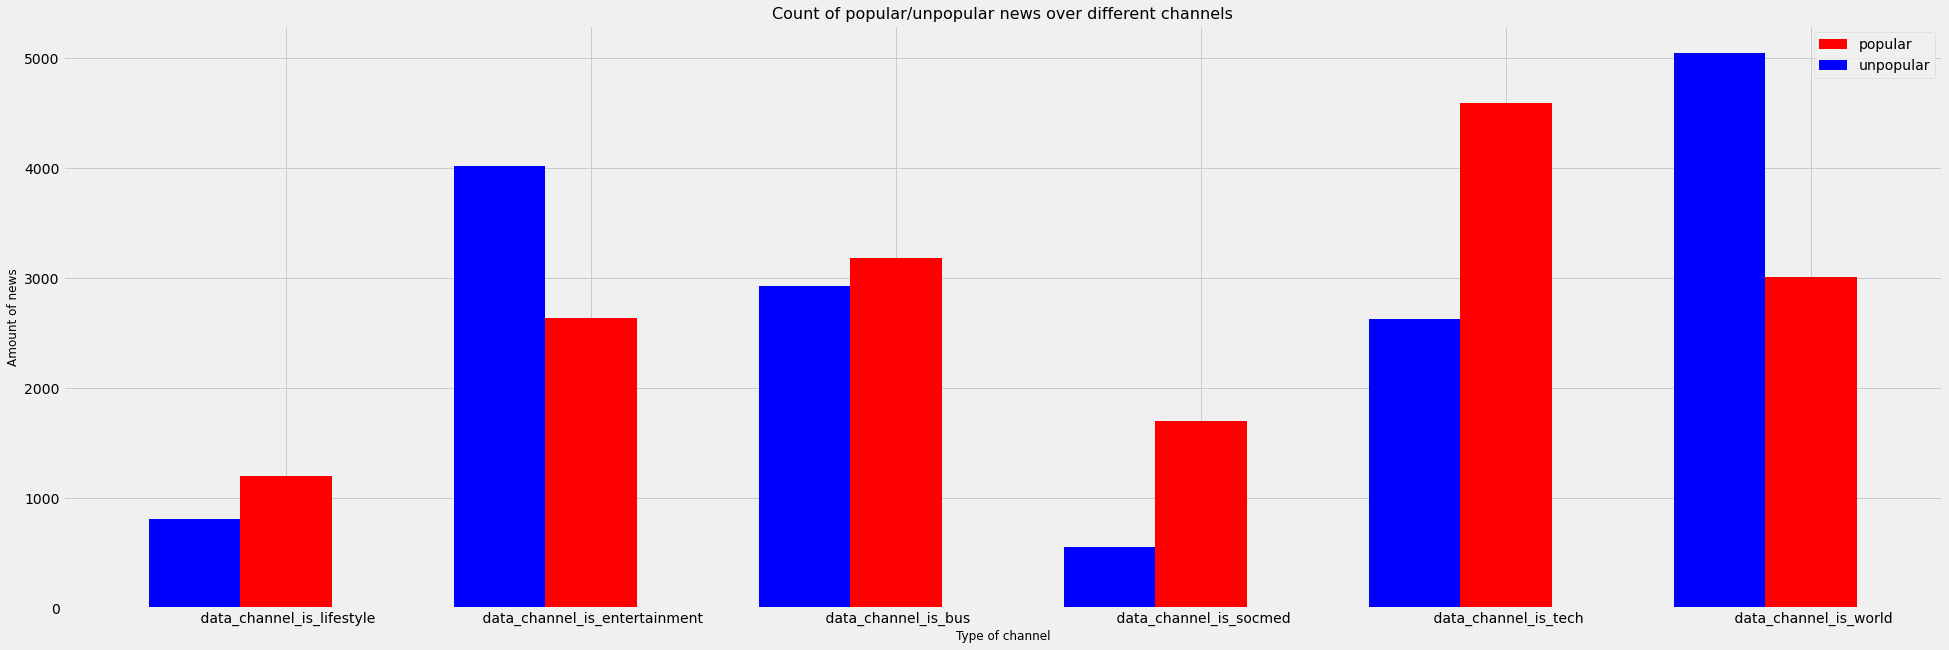

In [48]:
columns_channel = df.columns.values[8:14]

unpop=df[df[' shares']<1400]
pop=df[df[' shares']>=1400]

unpop_channel = unpop[columns_channel].sum().values
pop_channel = pop[columns_channel].sum().values



fig = plt.figure(figsize = (30,10))
plt.title("Count of popular/unpopular news over different channels", fontsize = 16)

plt.bar(np.arange(len(columns_channel)), pop_channel, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_channel)) - 0.3, unpop_channel, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")

plt.xticks(np.arange(len(columns_channel)), columns_channel)
plt.ylabel("Amount of news", fontsize = 12)
plt.xlabel("Type of channel", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.show()  

In [49]:
df.drop(columns = ' data_channel_is_lifestyle', inplace=True)
df.drop(columns = ' data_channel_is_entertainment', inplace=True)
df.drop(columns = ' data_channel_is_bus', inplace=True)
df.drop(columns = ' data_channel_is_socmed', inplace=True)
df.drop(columns = ' data_channel_is_tech', inplace=True)
df.drop(columns = ' data_channel_is_world', inplace=True)
print ("After channels removal - ",df.shape)

After channels removal -  (37470, 43)


## 4. Data pre-processing

### Encoding

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['publish_day'] = le.fit_transform(df.publish_day.values)
df['channel'] = le.fit_transform(df.channel.values)
df['popularity'] = le.fit_transform(df.popularity.values)
df

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0                 12.0              219.0         4.0              2.0   
1                  9.0              255.0         3.0              1.0   
2                  9.0              211.0         3.0              1.0   
3                  9.0              531.0         9.0              0.0   
4                 13.0             1072.0        19.0             19.0   
...                ...                ...         ...              ...   
39638             11.0              223.0         5.0              3.0   
39639             11.0              346.0         9.0              7.0   
39641             10.0              442.0        24.0              1.0   
39642              6.0              682.0        10.0              1.0   
39643             10.0              157.0         1.0              1.0   

        num_imgs   num_videos   average_token_length   num_keywords  \
0            1.0          0.0               4.680365            5.0   
1            1.0          0.0               4.913725            4.0   
2            1.0          0.0               4.393365            6.0   
3            1.0          0.0               4.404896            7.0   
4           20.0          0.0               4.682836            7.0   
...          ...          ...                    ...            ...   
39638        1.0          0.0               4.923767            6.0   
39639        1.0          1.0               4.523121            8.0   
39641       12.0          1.0               5.076923            8.0   
39642        1.0          0.0               4.975073            5.0   
39643        0.0          2.0               4.471338            4.0   

        kw_min_min   kw_min_max  ...   min_negative_polarity  \
0              0.0          0.0  ...                  -0.600   
1              0.0          0.0  ...                  -0.125   
2              0.0          0.0  ...                  -0.800   
3              0.0          0.0  ...                  -0.600   
4              0.0          0.0  ...                  -0.500   
...            ...          ...  ...                     ...   
39638         -1.0          0.0  ...                  -0.250   
39639         -1.0      26900.0  ...                  -0.500   
39641         -1.0       6200.0  ...                  -0.800   
39642         -1.0          0.0  ...                  -0.500   
39643         -1.0     205600.0  ...                  -0.200   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                   -0.200000             0.500000                  -0.187500   
1                   -0.100000             0.000000                   0.000000   
2                   -0.133333             0.000000                   0.000000   
3                   -0.166667             0.000000                   0.000000   
4                   -0.050000             0.454545                   0.136364   
...                       ...                  ...                        ...   
39638               -0.250000             0.000000                   0.000000   
39639               -0.125000             0.100000                   0.000000   
39641               -0.166667             0.454545                   0.136364   
39642               -0.012500             0.000000                   0.000000   
39643               -0.200000             0.333333                   0.250000   

        abs_title_subjectivity   abs_title_sentiment_polarity   shares  \
0                     0.000000                       0.187500      593   
1                     0.500000                       0.000000      711   
2                     0.500000                       0.000000     1500   
3                     0.500000                       0.000000     1200   
4                     0.045455                       0.136364      505   
...                        ...                            ...      ...   
39638 

### Normalization

In [51]:
from sklearn.preprocessing import StandardScaler

#Creation of a temporary dataframe
df_temp = copy(df)


#Normalization
temp = df_temp.sub(df.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
df_temp= temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonne

df_temp

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             0.770544          -0.780531   -0.681217        -0.365775   
1            -0.651386          -0.696796   -0.779490        -0.630709   
2            -0.651386          -0.799139   -0.779490        -0.630709   
3            -0.651386          -0.054826   -0.189856        -0.895643   
4             1.244521           1.203528    0.792865         4.138107   
...                ...                ...         ...              ...   
39638         0.296567          -0.771227   -0.582945        -0.100840   
39639         0.296567          -0.485132   -0.189856         0.958896   
39641        -0.177409          -0.261838    1.284226        -0.630709   
39642        -2.073316           0.296396   -0.091584        -0.630709   
39643        -0.177409          -0.924742   -0.976034        -0.630709   

        num_imgs   num_videos   average_token_length   num_keywords  \
0      -0.439246    -0.325863              -0.026839      -1.150879   
1      -0.439246    -0.325863               0.799909      -1.671781   
2      -0.439246    -0.325863              -1.043623      -0.629976   
3      -0.439246    -0.325863              -1.002769      -0.109074   
4       1.998106    -0.325863              -0.018086      -0.109074   
...          ...          ...                    ...            ...   
39638  -0.439246    -0.325863               0.835484      -0.629976   
39639  -0.439246    -0.048487              -0.583922       0.411828   
39641   0.971853    -0.048487               1.378086       0.411828   
39642  -0.439246    -0.325863               1.017252      -1.150879   
39643  -0.567528     0.228889              -0.767382      -1.671781   

        kw_min_min   kw_min_max  ...   min_negative_polarity  \
0        -0.380725    -0.231011  ...               -0.231770   
1        -0.380725    -0.231011  ...                1.470599   
2        -0.380725    -0.231011  ...               -0.948557   
3        -0.380725    -0.231011  ...               -0.231770   
4        -0.380725    -0.231011  ...                0.126623   
...            ...          ...  ...                     ...   
39638    -0.394935    -0.231011  ...                1.022607   
39639    -0.394935     0.245746  ...                0.126623   
39641    -0.394935    -0.121127  ...               -0.948557   
39642    -0.394935    -0.231011  ...                0.126623   
39643    -0.394935     3.412901  ...                1.201804   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                   -0.941783             0.684529                  -0.980896   
1                    0.113572            -0.864415                  -0.267791   
2                   -0.238213            -0.864415                  -0.267791   
3                   -0.589998            -0.864415                  -0.267791   
4                    0.641249             0.543716                   0.250831   
...                       ...                  ...                        ...   
39638               -1.469460            -0.864415                  -0.267791   
39639               -0.150267            -0.554626                  -0.267791   
39641               -0.589998             0.543716                   0.250831   
39642                1.037007            -0.864415                  -0.267791   
39643               -0.941783             0.168214                   0.683016   

        abs_title_subjectivity   abs_title_sentiment_polarity    shares  \
0                    -1.816496                       0.149970 -0.651172   
1                     0.833932                      -0.684966 -0.609219   
2                     0.833932                      -0.684966 -0.328701   
3                     0.833932                      -0.684966 -0.435362   
4                    -1.575548                      -0.077740 -0.682459   
...                        ...                            ...       ...   

In [52]:
#Removal of columns we don't want to normalize :
df_temp.drop(columns = 'publish_day', inplace=True)
df_temp.drop(columns = 'channel', inplace=True)
df_temp.drop(columns = 'popularity', inplace=True)
df_temp.drop(columns = ' shares', inplace=True)
df_temp

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             0.770544          -0.780531   -0.681217        -0.365775   
1            -0.651386          -0.696796   -0.779490        -0.630709   
2            -0.651386          -0.799139   -0.779490        -0.630709   
3            -0.651386          -0.054826   -0.189856        -0.895643   
4             1.244521           1.203528    0.792865         4.138107   
...                ...                ...         ...              ...   
39638         0.296567          -0.771227   -0.582945        -0.100840   
39639         0.296567          -0.485132   -0.189856         0.958896   
39641        -0.177409          -0.261838    1.284226        -0.630709   
39642        -2.073316           0.296396   -0.091584        -0.630709   
39643        -0.177409          -0.924742   -0.976034        -0.630709   

        num_imgs   num_videos   average_token_length   num_keywords  \
0      -0.439246    -0.325863              -0.026839      -1.150879   
1      -0.439246    -0.325863               0.799909      -1.671781   
2      -0.439246    -0.325863              -1.043623      -0.629976   
3      -0.439246    -0.325863              -1.002769      -0.109074   
4       1.998106    -0.325863              -0.018086      -0.109074   
...          ...          ...                    ...            ...   
39638  -0.439246    -0.325863               0.835484      -0.629976   
39639  -0.439246    -0.048487              -0.583922       0.411828   
39641   0.971853    -0.048487               1.378086       0.411828   
39642  -0.439246    -0.325863               1.017252      -1.150879   
39643  -0.567528     0.228889              -0.767382      -1.671781   

        kw_min_min   kw_min_max  ...   avg_positive_polarity  \
0        -0.380725    -0.231011  ...                0.169701   
1        -0.380725    -0.231011  ...               -0.904758   
2        -0.380725    -0.231011  ...                1.542584   
3        -0.380725    -0.231011  ...                0.255553   
4        -0.380725    -0.231011  ...                0.550312   
...            ...          ...  ...                     ...   
39638    -0.394935    -0.231011  ...                2.452038   
39639    -0.394935     0.245746  ...               -0.355630   
39641    -0.394935    -0.121127  ...               -0.666276   
39642    -0.394935    -0.231011  ...               -1.491224   
39643    -0.394935     3.412901  ...               -1.368375   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                    0.023358               -0.370089               -0.690435   
1                   -0.925063               -0.370089                1.221029   
2                    0.023358                1.040932               -1.654777   
3                    0.540678                0.100251               -0.853246   
4                   -0.925063                1.040932                0.382528   
...                       ...                     ...                     ...   
39638                1.649222                0.100251                0.136144   
39639                0.023358               -0.134919                0.053486   
39641                0.540678               -1.310769               -0.743661   
39642               -0.510129               -1.310769                0.506075   
39643                0.023358               -1.310769                0.549434   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                   -0.231770               -0.941783             0.684529   
1                    1.470599                0.113572            -0.864415   
2                   -0.948557               -0.238213            -0.864415   
3                   -0.231770               -0.589998            -0.864415   
4                    0.126623                0.641249             0.543716   
...                       ...                     ...   

In [53]:
df_temp['popularity']=df['popularity']
df_temp['channel']=df['channel']
df_temp['publish_day']=df['publish_day']
df_temp['shares']=df[' shares']
df_temp

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             0.770544          -0.780531   -0.681217        -0.365775   
1            -0.651386          -0.696796   -0.779490        -0.630709   
2            -0.651386          -0.799139   -0.779490        -0.630709   
3            -0.651386          -0.054826   -0.189856        -0.895643   
4             1.244521           1.203528    0.792865         4.138107   
...                ...                ...         ...              ...   
39638         0.296567          -0.771227   -0.582945        -0.100840   
39639         0.296567          -0.485132   -0.189856         0.958896   
39641        -0.177409          -0.261838    1.284226        -0.630709   
39642        -2.073316           0.296396   -0.091584        -0.630709   
39643        -0.177409          -0.924742   -0.976034        -0.630709   

        num_imgs   num_videos   average_token_length   num_keywords  \
0      -0.439246    -0.325863              -0.026839      -1.150879   
1      -0.439246    -0.325863               0.799909      -1.671781   
2      -0.439246    -0.325863              -1.043623      -0.629976   
3      -0.439246    -0.325863              -1.002769      -0.109074   
4       1.998106    -0.325863              -0.018086      -0.109074   
...          ...          ...                    ...            ...   
39638  -0.439246    -0.325863               0.835484      -0.629976   
39639  -0.439246    -0.048487              -0.583922       0.411828   
39641   0.971853    -0.048487               1.378086       0.411828   
39642  -0.439246    -0.325863               1.017252      -1.150879   
39643  -0.567528     0.228889              -0.767382      -1.671781   

        kw_min_min   kw_min_max  ...   min_negative_polarity  \
0        -0.380725    -0.231011  ...               -0.231770   
1        -0.380725    -0.231011  ...                1.470599   
2        -0.380725    -0.231011  ...               -0.948557   
3        -0.380725    -0.231011  ...               -0.231770   
4        -0.380725    -0.231011  ...                0.126623   
...            ...          ...  ...                     ...   
39638    -0.394935    -0.231011  ...                1.022607   
39639    -0.394935     0.245746  ...                0.126623   
39641    -0.394935    -0.121127  ...               -0.948557   
39642    -0.394935    -0.231011  ...                0.126623   
39643    -0.394935     3.412901  ...                1.201804   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                   -0.941783             0.684529                  -0.980896   
1                    0.113572            -0.864415                  -0.267791   
2                   -0.238213            -0.864415                  -0.267791   
3                   -0.589998            -0.864415                  -0.267791   
4                    0.641249             0.543716                   0.250831   
...                       ...                  ...                        ...   
39638               -1.469460            -0.864415                  -0.267791   
39639               -0.150267            -0.554626                  -0.267791   
39641               -0.589998             0.543716                   0.250831   
39642                1.037007            -0.864415                  -0.267791   
39643               -0.941783             0.168214                   0.683016   

        abs_title_subjectivity   abs_title_sentiment_polarity  popularity  \
0                    -1.816496                       0.149970           2   
1                     0.833932                      -0.684966           2   
2                     0.833932                      -0.684966           0   
3                     0.833932                      -0.684966           4   
4                    -1.575548                      -0.077740           2   
...                        ...                            ... 

### Imputation

## 5. Modelling

#### Final dataset

In [54]:
modelling_data=copy(df_temp)

In [55]:
modelling_data.drop(columns = ' n_tokens_title', inplace=True)
modelling_data.drop(columns = ' n_tokens_content', inplace=True)
modelling_data.drop(columns = ' num_self_hrefs', inplace=True)
modelling_data.drop(columns = ' num_videos', inplace=True)
modelling_data.drop(columns = ' average_token_length', inplace=True)
modelling_data.drop(columns = ' kw_min_min', inplace=True)
modelling_data.drop(columns = ' kw_min_max', inplace=True)
modelling_data.drop(columns = ' min_negative_polarity', inplace=True)
modelling_data.drop(columns = ' max_negative_polarity', inplace=True)
modelling_data.drop(columns = ' title_sentiment_polarity', inplace=True)
modelling_data.drop(columns = ' abs_title_subjectivity', inplace=True)
modelling_data.drop(columns = ' kw_avg_max', inplace=True)
modelling_data.drop(columns = ' kw_max_max', inplace=True)
modelling_data.drop(columns = ' min_positive_polarity', inplace=True)
modelling_data.drop(columns = ' avg_negative_polarity', inplace=True)
modelling_data.drop(columns = ' LDA_00', inplace=True)
modelling_data.drop(columns = ' LDA_01', inplace=True)
modelling_data.drop(columns = ' LDA_02', inplace=True)
modelling_data.drop(columns = ' rate_positive_words', inplace=True)
modelling_data.drop(columns = ' rate_negative_words', inplace=True)
modelling_data.drop(columns = ' LDA_04', inplace=True)
modelling_data.drop(columns = ' global_sentiment_polarity', inplace=True)
modelling_data.drop(columns = ' global_rate_positive_words', inplace=True)
modelling_data.drop(columns = ' global_rate_negative_words', inplace=True)
print ("After columns removal - ",modelling_data.shape)

After columns removal -  (37470, 19)


In [56]:
modelling_data

num_hrefs   num_imgs   num_keywords   kw_min_avg   kw_max_avg  \
0       -0.681217  -0.439246      -1.150879    -0.977179    -1.374873   
1       -0.779490  -0.439246      -1.671781    -0.977179    -1.374873   
2       -0.779490  -0.439246      -0.629976    -0.977179    -1.374873   
3       -0.189856  -0.439246      -0.109074    -0.977179    -1.374873   
4        0.792865   1.998106      -0.109074    -0.977179    -1.374873   
...           ...        ...            ...          ...          ...   
39638   -0.582945  -0.439246      -0.629976    -0.977179    -0.275289   
39639   -0.189856  -0.439246       0.411828     1.267533    -0.351211   
39641    1.284226   0.971853       0.411828     0.588373     0.384092   
39642   -0.091584  -0.439246      -1.150879    -0.977179    -0.509713   
39643   -0.976034  -0.567528      -1.671781     1.731998    -0.451122   

        kw_avg_avg   self_reference_min_shares   self_reference_max_shares  \
0        -2.836075                   -0.180283                   -0.247514   
1        -2.836075                   -0.206034                   -0.260352   
2        -2.836075                   -0.158373                   -0.236592   
3        -2.836075                   -0.206034                   -0.260352   
4        -2.836075                   -0.177739                    0.153772   
...            ...                         ...                         ...   
39638    -0.361997                   -0.102198                   -0.112820   
39639    -0.022863                    0.385828                    0.982019   
39641     1.067968                   -0.133349                   -0.224116   
39642    -1.185990                   -0.182567                   -0.248653   
39643     0.223823                   -0.097007                   -0.205998   

        self_reference_avg_sharess    LDA_03   global_subjectivity  \
0                        -0.248309 -0.587896              0.743380   
1                        -0.269541 -0.557010             -1.301844   
2                        -0.230244 -0.615605              2.791255   
3                        -0.269541 -0.631082             -0.297168   
4                        -0.134649 -0.632246              0.651364   
...                            ...       ...                   ...   
39638                    -0.114009 -0.615600              1.088353   
39639                     1.315750 -0.644728              0.301857   
39641                    -0.209611  1.517742              0.615008   
39642                    -0.250193 -0.592301             -1.105319   
39643                    -0.179646 -0.555060              0.701155   

        avg_positive_polarity   max_positive_polarity   title_subjectivity  \
0                    0.169701               -0.370089             0.684529   
1                   -0.904758               -0.370089            -0.864415   
2                    1.542584                1.040932            -0.864415   
3                    0.255553                0.100251            -0.864415   
4                    0.550312                1.040932             0.543716   
...                       ...                     ...                  ...   
39638                2.452038                0.100251            -0.864415   
39639               -0.355630               -0.134919            -0.554626   
39641               -0.666276               -1.310769             0.543716   
39642               -1.491224               -1.310769            -0.864415   
39643               -1.368375               -1.310769             0.168214   

        abs_title_sentiment_polarity  popularity  channel  publish_day  shares  
0                           0.149970           2        1            1     593  
1                          -0.684966           2        0            1     711  
2                          -0.684966           0        0            1    1500  
3                          -0.684966           4        1            1    1200  
4          

### Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(modelling_data, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['shares'], axis=1)
y_train_set = train_set['shares']

X_test_set = test_set.drop(['shares'], axis=1)
y_test_set = test_set['shares']

In [58]:
print(X_train_set.shape)
print(X_test_set.shape)
print(y_train_set.shape)
print(y_test_set.shape)

(29976, 18)
(7494, 18)
(29976,)
(7494,)


### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression()

In [60]:
# We test our LinearRegression model with a sample of 500 values from the training set 

sample_X = X_train_set.iloc[:500]
sample_y = y_train_set.iloc[:500]


# We test how the model works 

df_sampleX = pd.DataFrame(lin_reg.predict(sample_X),list(sample_y)) #creation of a dataframe to show results
df_sampleX.reset_index(level=0, inplace=True)
df_sampleX_LR = df_sampleX.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_sampleX_LR.head()

Actual shares  Predicted shares
0           3100       1670.995200
1           1500       2860.915933
2           1900       2715.613544
3           1500       2547.820292
4            773       2923.400237

<AxesSubplot:xlabel='Actual shares', ylabel='Predicted shares'>

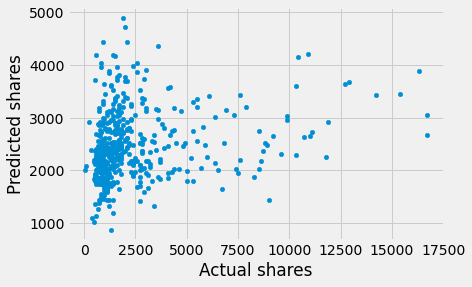

In [61]:
df_sampleX_LR.plot.scatter(x='Actual shares', y="Predicted shares")

#### RMSE and MAE

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

share_predictions = lin_reg.predict(X_train_set)

linReg_mse = mean_squared_error(y_train_set, share_predictions)
linReg_rmse = np.sqrt(linReg_mse)

print("RMSE :",linReg_rmse)

linReg_mae = mean_absolute_error(y_train_set, share_predictions)
print("MAE : ", linReg_mae) 

print("Median :",modelling_data['shares'].median())

RMSE : 2728.267355326272
MAE :  1709.026634383628
Median : 1400.0


### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_set, y_train_set)

DecisionTreeRegressor(random_state=42)

In [64]:
# We test our LinearRegression model with a sample of 500 values from the training set
sample_X = X_train_set.iloc[:500]
sample_y = y_train_set.iloc[:500]

# We test how the model works 

df_sampleX = pd.DataFrame(tree_reg.predict(sample_X),list(sample_y)) #creation of a dataframe to show results
df_sampleX.reset_index(level=0, inplace=True)
df_sampleX_DT = df_sampleX.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_sampleX_DT.head()

Actual shares  Predicted shares
0           3100            3100.0
1           1500            1500.0
2           1900            1900.0
3           1500            1500.0
4            773             773.0

<AxesSubplot:xlabel='Actual shares', ylabel='Predicted shares'>

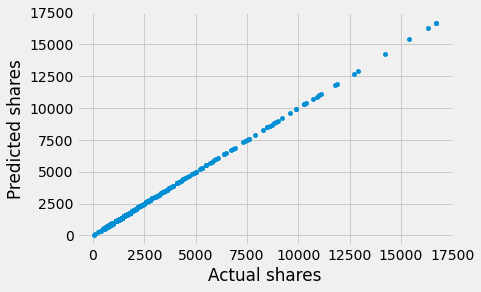

In [65]:
df_sampleX_DT.plot.scatter(x='Actual shares', y="Predicted shares")

#### RMSE and MAE

In [66]:
share_predictions = tree_reg.predict(X_train_set)
tree_mse = mean_squared_error(y_train_set, share_predictions)
tree_rmse = np.sqrt(tree_mse)


print("RMSE :",tree_rmse)

tree_mae = mean_absolute_error(y_train_set, share_predictions)
print("MAE : ", tree_mae) 

print("Median :",modelling_data['shares'].median())

RMSE : 0.0
MAE :  0.0
Median : 1400.0


#### Cross-validation

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=5)

tree_rmse_scores = np.sqrt(-scores)
print("SCORES :",tree_rmse_scores)
print("MEAN : ",tree_rmse_scores.mean())
print("STANDARD DEVIATION : ",tree_rmse_scores.std())

SCORES : [1647.10601348 1608.36477451 1656.59812385 1631.23410309 1584.6107889 ]
MEAN :  1625.5827607657893
STANDARD DEVIATION :  26.200390663002427


### RandomForest

In [68]:
from sklearn.ensemble import RandomForestRegressor

Rforest_reg = RandomForestRegressor(random_state=42)
Rforest_reg.fit(X_train_set, y_train_set)

RandomForestRegressor(random_state=42)

In [69]:
# We test our LinearRegression model with a sample of 500 values from the training set
sample_X = X_train_set.iloc[:500]
sample_y = y_train_set.iloc[:500]

# We test how the model works 

df_sampleX = pd.DataFrame(Rforest_reg.predict(sample_X),list(sample_y)) #creation of a dataframe to show results
df_sampleX.reset_index(level=0, inplace=True)
df_sampleX_RF = df_sampleX.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_sampleX_RF.head()

Actual shares  Predicted shares
0           3100           3253.00
1           1500           1639.00
2           1900           1873.00
3           1500           1611.00
4            773            755.33

<AxesSubplot:xlabel='Actual shares', ylabel='Predicted shares'>

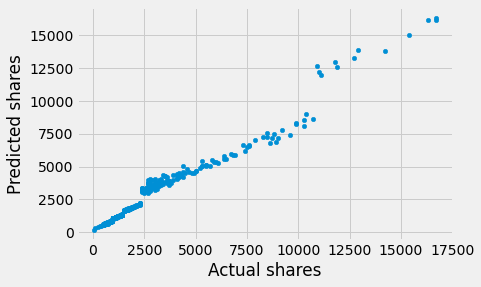

In [70]:
df_sampleX_RF.plot.scatter(x='Actual shares', y="Predicted shares")

#### RMSE and MAE

In [71]:
share_predictions = Rforest_reg.predict(X_train_set)
Rforest_mse = mean_squared_error(y_train_set, share_predictions)
Rforest_rmse = np.sqrt(Rforest_mse)


print("RMSE :",Rforest_rmse)

Rforest_mae = mean_absolute_error(y_train_set, share_predictions)
print("MAE : ", Rforest_mae) 

print("Median :",modelling_data['shares'].median())

RMSE : 433.90811012758326
MAE :  224.7200490392314
Median : 1400.0


#### Cross-validation

In [72]:
scores = cross_val_score(Rforest_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=5)

tree_rmse_scores = np.sqrt(-scores)
print("SCORES :",tree_rmse_scores)
print("MEAN : ",tree_rmse_scores.mean())
print("STANDARD DEVIATION : ",tree_rmse_scores.std())

SCORES : [1168.30927982 1139.70444033 1149.47417059 1173.79331164 1152.93735353]
MEAN :  1156.8437111822661
STANDARD DEVIATION :  12.506578938704592


## 6. Summarizing the 3 models

## 7. Finding the optimal number of hyperparameters through Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV

parameters = { 'n_estimators': [3,10], 
               'max_features': [2,3,4],
               #'min_samples_split':[2,3,4],
               #'n_jobs': [-1,1],
             }

Rforest_reg = RandomForestRegressor()
grid = GridSearchCV(Rforest_reg, parameters, cv=5,
                          scoring="neg_mean_squared_error")

grid.fit(X_train_set, y_train_set)


print ("BEST SCORE :",np.sqrt(-grid.best_score_))
print("BEST ESTIMATOR :", grid.best_estimator_)

BEST SCORE : 1740.168094176787
BEST ESTIMATOR : RandomForestRegressor(max_features=4, n_estimators=10)


## 8.  Evaluating the Final Model with the Test Set

In [74]:

final_model = RandomForestRegressor(random_state=42,n_estimators=10, max_features=4)
final_model.fit(X_train_set, y_train_set)
final_predictions = final_model.predict(X_test_set)


In [75]:
final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1754.5627997861409

#### Testing the model 

In [76]:
sample_X = X_test_set
sample_y = y_test_set

Predicted_shares = list(final_model.predict(sample_X)) 

Actual_shares = list(sample_y)

final_data = [Predicted_shares, Actual_shares]

#creation of a dataframe to show results

final_df = pd.DataFrame(Predicted_shares, Actual_shares)   
final_df.reset_index(level=0, inplace=True)
final_df_results = final_df.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
final_df_results.head()

Actual shares  Predicted shares
0           6700            4690.0
1           4100            3394.5
2           6200            2771.5
3           1700            1930.0
4            721            4034.3

#### Plots to show the results 

<AxesSubplot:xlabel='Actual shares', ylabel='Predicted shares'>

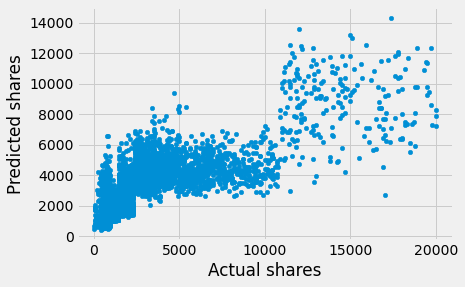

In [77]:
final_df_results.plot.scatter(x='Actual shares', y="Predicted shares")

<ipython-input-78-60b9d8f3368d>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes=plt.axes()


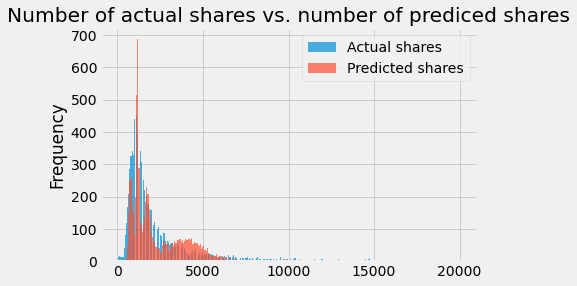

In [78]:
final_df_results.plot(bins=300, kind='hist', alpha=0.7)
plt.title('Number of actual shares vs. number of prediced shares')
axes=plt.axes()
plt.show()

## 9. Conclusion